V1: Recency - months since last donation

V2: Frequency - total number of donation

V3: Monetary - total blood donated in c.c.

V4: Time - months since first donation

The target attribute is a binary variable representing whether he/she donated blood in March 2007 (2 stands for donating blood; 1 stands for not donating blood)


---


V1: давність – місяці з моменту останньої пожертви

V2: Частота - загальна кількість донацій

V3: Грошовий – загальна кількість донорської крові в c.c.

V4: Час – місяці з моменту першої донації

Цільовий атрибут — це двійкова змінна, яка вказує, чи здавав він/вона кров у березні 2007 року (2 означає здачу крові; 1 означає відсутність донорства крові)

In [38]:
!pip install arff


In [39]:
from sklearn.utils import *
from scipy.io import arff
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
sns.set_style("whitegrid")
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
data, meta = arff.loadarff('/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/Datasets/blood-transfusion-service-dataset.arff')

In [41]:
df = pd.DataFrame(data, columns=meta.names())

In [42]:
df

,V1,V2,V3,V4,Class
0,2.0,50.0,12500.0,98.0,b'2'
1,0.0,13.0,3250.0,28.0,b'2'
2,1.0,16.0,4000.0,35.0,b'2'
3,2.0,20.0,5000.0,45.0,b'2'
4,1.0,24.0,6000.0,77.0,b'1'
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,b'1'
744,21.0,2.0,500.0,52.0,b'1'
745,23.0,3.0,750.0,62.0,b'1'
746,39.0,1.0,250.0,39.0,b'1'


In [43]:
V1 = "Recency - months since last donation"
V2 = "Frequency - total number of donation"
V3 = "Monetary - total blood donated in c.c."
V4 = "Time - months since first donation"

In [44]:
type(data)

numpy.ndarray

In [45]:

type(meta)

scipy.io.arff._arffread.MetaData

In [46]:
meta.names()

['V1', 'V2', 'V3', 'V4', 'Class']

In [47]:

meta.types()

['numeric', 'numeric', 'numeric', 'numeric', 'nominal']

In [48]:
print(meta)

Dataset: blood-transfusion-service
	V1's type is numeric
	V2's type is numeric
	V3's type is numeric
	V4's type is numeric
	Class's type is nominal, range is ('1', '2')



In [49]:
print(data)

[( 2., 50., 12500., 98., b'2') ( 0., 13.,  3250., 28., b'2')
 ( 1., 16.,  4000., 35., b'2') ( 2., 20.,  5000., 45., b'2')
 ( 1., 24.,  6000., 77., b'1') ( 4.,  4.,  1000.,  4., b'1')
 ( 2.,  7.,  1750., 14., b'2') ( 1., 12.,  3000., 35., b'1')
 ( 2.,  9.,  2250., 22., b'2') ( 5., 46., 11500., 98., b'2')
 ( 4., 23.,  5750., 58., b'1') ( 0.,  3.,   750.,  4., b'1')
 ( 2., 10.,  2500., 28., b'2') ( 1., 13.,  3250., 47., b'1')
 ( 2.,  6.,  1500., 15., b'2') ( 2.,  5.,  1250., 11., b'2')
 ( 2., 14.,  3500., 48., b'2') ( 2., 15.,  3750., 49., b'2')
 ( 2.,  6.,  1500., 15., b'2') ( 2.,  3.,   750.,  4., b'2')
 ( 2.,  3.,   750.,  4., b'2') ( 4., 11.,  2750., 28., b'1')
 ( 2.,  6.,  1500., 16., b'2') ( 2.,  6.,  1500., 16., b'2')
 ( 9.,  9.,  2250., 16., b'1') ( 4., 14.,  3500., 40., b'1')
 ( 4.,  6.,  1500., 14., b'1') ( 4., 12.,  3000., 34., b'2')
 ( 4.,  5.,  1250., 11., b'2') ( 4.,  8.,  2000., 21., b'1')
 ( 1., 14.,  3500., 58., b'1') ( 4., 10.,  2500., 28., b'2')
 ( 4., 10.,  2500., 28.,

In [50]:
df['Class'] = df['Class'].replace({b'1': 0, b'2': 1})
df['Class']

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: Class, Length: 748, dtype: int64

In [51]:
df.head(15)

,V1,V2,V3,V4,Class
0,2.0,50.0,12500.0,98.0,1
1,0.0,13.0,3250.0,28.0,1
2,1.0,16.0,4000.0,35.0,1
3,2.0,20.0,5000.0,45.0,1
4,1.0,24.0,6000.0,77.0,0
5,4.0,4.0,1000.0,4.0,0
6,2.0,7.0,1750.0,14.0,1
7,1.0,12.0,3000.0,35.0,0
8,2.0,9.0,2250.0,22.0,1
9,5.0,46.0,11500.0,98.0,1


In [52]:
df.tail(15)

,V1,V2,V3,V4,Class
733,23.0,1.0,250.0,23.0,0
734,23.0,1.0,250.0,23.0,0
735,23.0,1.0,250.0,23.0,0
736,23.0,1.0,250.0,23.0,0
737,23.0,1.0,250.0,23.0,0
738,23.0,1.0,250.0,23.0,0
739,23.0,4.0,1000.0,52.0,0
740,23.0,1.0,250.0,23.0,0
741,23.0,7.0,1750.0,88.0,0
742,16.0,3.0,750.0,86.0,0


In [53]:
shuffled_df = pd.DataFrame(data, columns=meta.names()).sample(frac=1).copy()

In [54]:
shuffled_df['Class'] = shuffled_df['Class'].replace({b'1': 0, b'2': 1})
shuffled_df['Class']

37     1
129    1
625    0
406    0
269    0
      ..
732    1
81     0
725    0
151    0
628    0
Name: Class, Length: 748, dtype: int64

In [55]:
shuffled_df.head(25)

,V1,V2,V3,V4,Class
37,4.0,6.0,1500.0,16.0,1
129,2.0,2.0,500.0,10.0,1
625,7.0,5.0,1250.0,35.0,0
406,16.0,1.0,250.0,16.0,0
269,13.0,4.0,1000.0,21.0,0
429,16.0,3.0,750.0,40.0,0
675,16.0,3.0,750.0,23.0,0
587,2.0,1.0,250.0,2.0,0
535,4.0,5.0,1250.0,16.0,1
728,21.0,1.0,250.0,21.0,0


In [56]:
shuffled_df.reset_index().head()


,index,V1,V2,V3,V4,Class
0,37,4.0,6.0,1500.0,16.0,1
1,129,2.0,2.0,500.0,10.0,1
2,625,7.0,5.0,1250.0,35.0,0
3,406,16.0,1.0,250.0,16.0,0
4,269,13.0,4.0,1000.0,21.0,0


In [57]:
shuffled_df.reset_index(drop=True, inplace=True)

In [58]:
shuffled_df.head(10)

,V1,V2,V3,V4,Class
0,4.0,6.0,1500.0,16.0,1
1,2.0,2.0,500.0,10.0,1
2,7.0,5.0,1250.0,35.0,0
3,16.0,1.0,250.0,16.0,0
4,13.0,4.0,1000.0,21.0,0
5,16.0,3.0,750.0,40.0,0
6,16.0,3.0,750.0,23.0,0
7,2.0,1.0,250.0,2.0,0
8,4.0,5.0,1250.0,16.0,1
9,21.0,1.0,250.0,21.0,0


In [59]:
shuffled_df.tail(10)

,V1,V2,V3,V4,Class
738,23.0,12.0,3000.0,86.0,0
739,2.0,12.0,3000.0,70.0,1
740,14.0,2.0,500.0,14.0,0
741,14.0,3.0,750.0,21.0,0
742,16.0,4.0,1000.0,33.0,0
743,23.0,1.0,250.0,23.0,1
744,2.0,4.0,1000.0,16.0,0
745,21.0,1.0,250.0,21.0,0
746,4.0,6.0,1500.0,39.0,0
747,2.0,5.0,1250.0,63.0,0


In [60]:
shuffled_df.shape

(748, 5)

In [61]:
shuffled_df[5:15]

,V1,V2,V3,V4,Class
5,16.0,3.0,750.0,40.0,0
6,16.0,3.0,750.0,23.0,0
7,2.0,1.0,250.0,2.0,0
8,4.0,5.0,1250.0,16.0,1
9,21.0,1.0,250.0,21.0,0
10,21.0,3.0,750.0,35.0,0
11,2.0,6.0,1500.0,16.0,1
12,2.0,8.0,2000.0,35.0,1
13,2.0,1.0,250.0,2.0,0
14,21.0,3.0,750.0,40.0,0


In [62]:
shuffled_df.loc[7:12,"Class"]

7     0
8     1
9     0
10    0
11    1
12    1
Name: Class, dtype: int64

In [63]:
shuffled_df.loc[shuffled_df['Class'] == 0, ["V1", "V2", "Class"]].head(10)

,V1,V2,Class
2,7.0,5.0,0
3,16.0,1.0,0
4,13.0,4.0,0
5,16.0,3.0,0
6,16.0,3.0,0
7,2.0,1.0,0
9,21.0,1.0,0
10,21.0,3.0,0
13,2.0,1.0,0
14,21.0,3.0,0


In [64]:
shuffled_df['Class']=shuffled_df['Class'].astype(int)

In [65]:
shuffled_df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
Class      int64
dtype: object

In [66]:
shuffled_df.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


Text(0.5, 0, 'Recency - months since last donation')

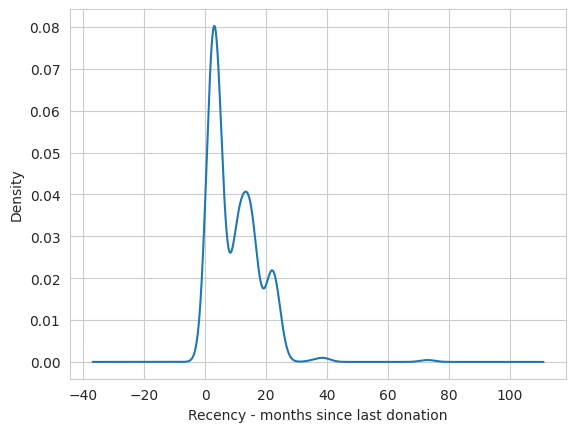

In [67]:
_=shuffled_df['V1'].plot(kind='density')
plt.xlabel(V1)

Text(0.5, 0, 'Time - months since first donation')

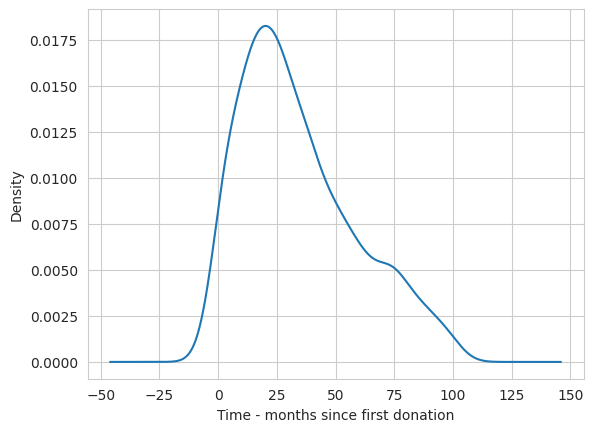

In [68]:
_=shuffled_df['V4'].plot(kind='density')
plt.xlabel(V4)

Text(0, 0.5, 'Frequency - total number of donation')

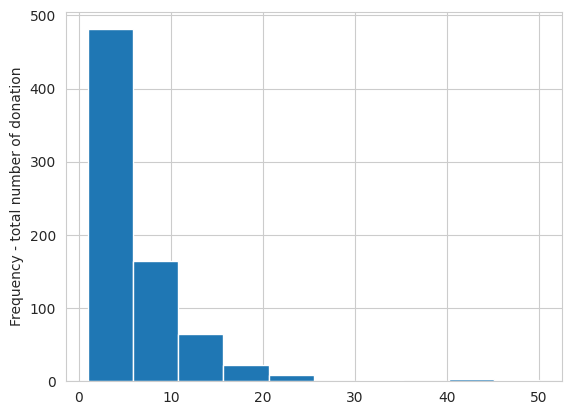

In [69]:
_=shuffled_df['V2'].plot(kind='hist')
plt.ylabel(V2)

In [70]:
colors=['red','green']
shuffled_df['color']=shuffled_df["Class"].apply(lambda x: colors[x])

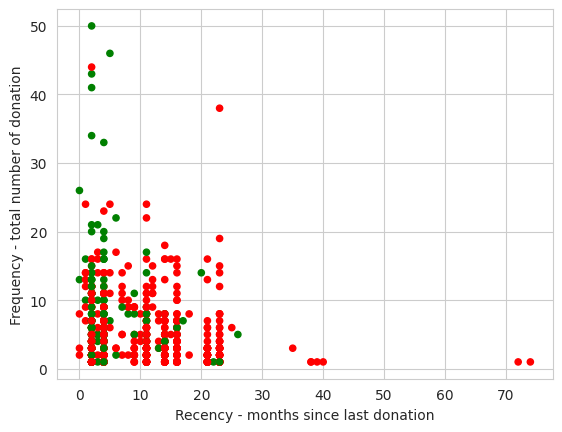

In [74]:
shuffled_df.plot.scatter(x='V1',y='V2', c=shuffled_df['color'])
plt.xlabel(V1)
plt.ylabel(V2)
plt.show()

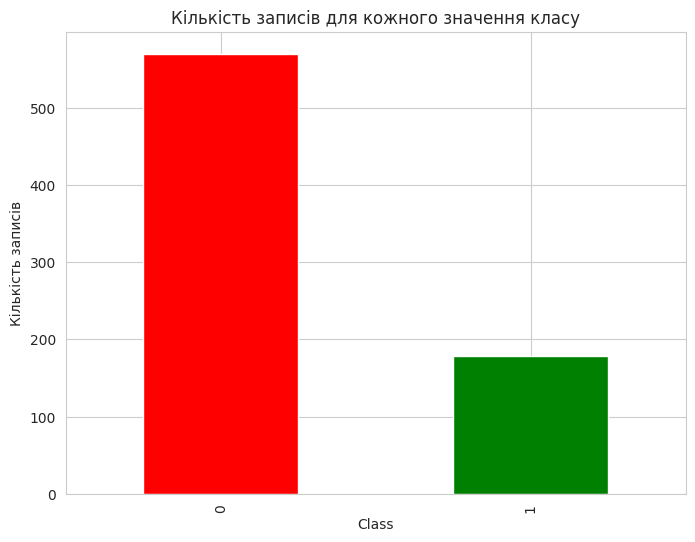

In [72]:
class_counts = shuffled_df['Class'].value_counts()

# Побудова свічкової діаграми з різними кольорами
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['red', 'green'])  # Першій червоний, другій зелений
plt.xlabel('Class')
plt.ylabel('Кількість записів')
plt.title('Кількість записів для кожного значення класу')
plt.show()

In [73]:
df.to_csv('/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/Datasets/blood-transfusion-service-dataset.csv')